# Public Safety Exercise

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
print(len(df))

ModuleNotFoundError: No module named 'matplotlib'

In [21]:
df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0


In [28]:
df.Date

0          02/15/2004
1          03/14/2013
2          10/08/2013
3          08/29/2004
4          07/29/2005
              ...    
2160948    07/04/2016
2160949    06/01/2017
2160950    06/09/2017
2160951    11/22/2017
2160952    03/22/2017
Name: Date, Length: 2160953, dtype: object

## Categories of crime:


In [12]:
len(pd.unique(df['Category']))

38

In [9]:
df['Category'].value_counts()

LARCENY/THEFT                  477975
OTHER OFFENSES                 303027
NON-CRIMINAL                   236937
ASSAULT                        191384
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117875
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79740
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
SEX OFFENSES, FORCIBLE          10876
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4966
LIQUOR LAWS                      3941
ARSON       

## Types of crime per year 

<AxesSubplot:>

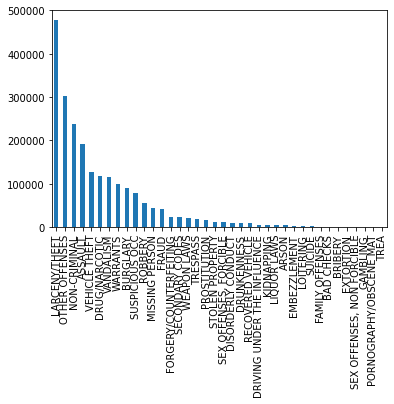

In [20]:
df['Category'].value_counts().plot(kind="bar")

# Crime per year

<AxesSubplot:xlabel='Date'>

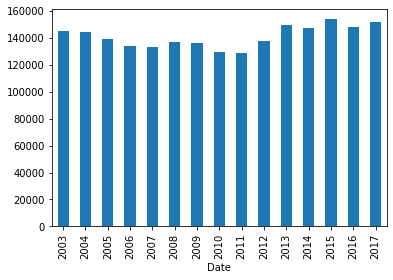

In [71]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].groupby(df.Date.dt.to_period("Y")).agg('count')[:-1].plot(kind="bar")

<Figure size 432x288 with 0 Axes>

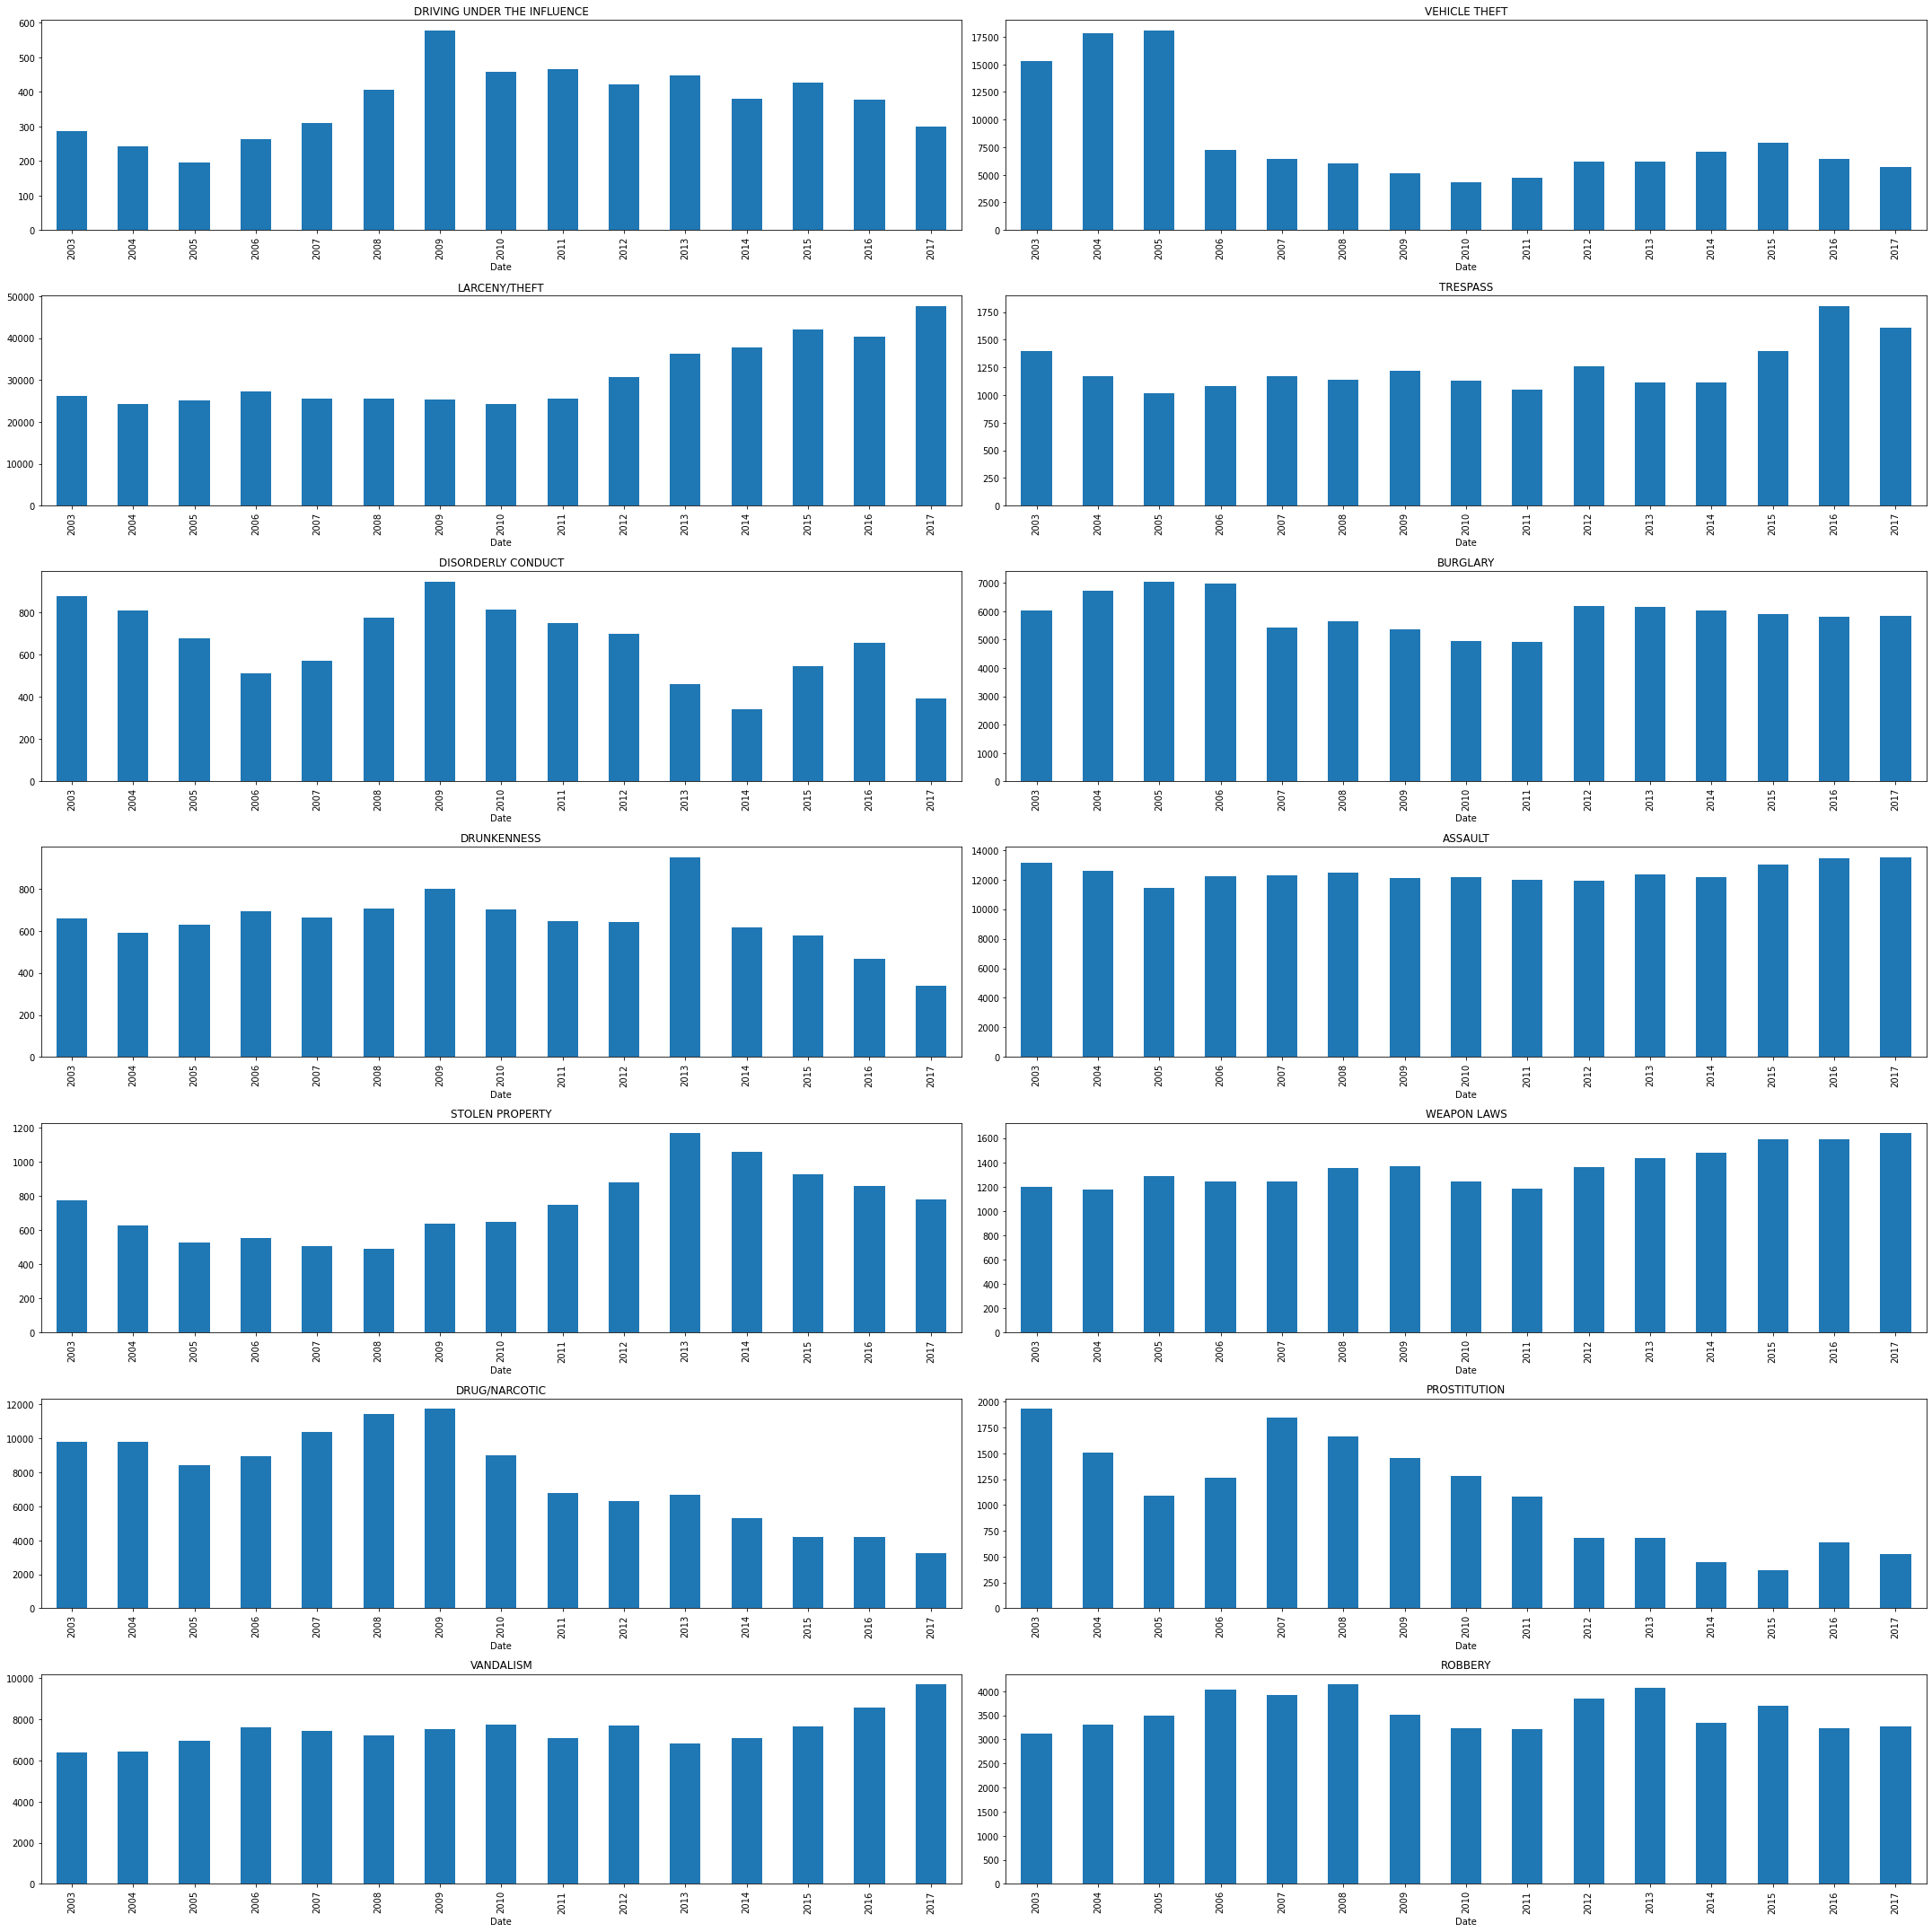

In [70]:

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
plt.subplots_adjust(wspace=2, hspace=10)
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30))

for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(df.Date.dt.to_period("Y")).agg('count')[:-1].plot(kind='bar', ax=ax, title=crime)
    
fig.tight_layout()
plt.show()

# Interesting points
* Prostitution fell a lot.
* Disorderly conduct is going downwards
* Larceny/theft is growing